Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8053 - loss: 0.4758 - val_accuracy: 0.8201 - val_loss: 0.4233
Epoch 2/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8219 - loss: 0.4223 - val_accuracy: 0.8209 - val_loss: 0.4222
Epoch 3/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8234 - loss: 0.4211 - val_accuracy: 0.8211 - val_loss: 0.4220
Epoch 4/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8221 - loss: 0.4191 - val_accuracy: 0.8214 - val_loss: 0.4218
Epoch 5/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8217 - loss: 0.4208 - val_accuracy: 0.8226 - val_loss: 0.4212
Epoch 6/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8241 - loss: 0.4185 - val_accuracy: 0.8222 - val_loss: 0.4211
Epoch 7/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8245 - loss: 0.4162 - val_accuracy: 0.8220 - val_loss: 0.4212
Epoch 8/10
1778/1778 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8252 - loss: 0.4159 - val_accur

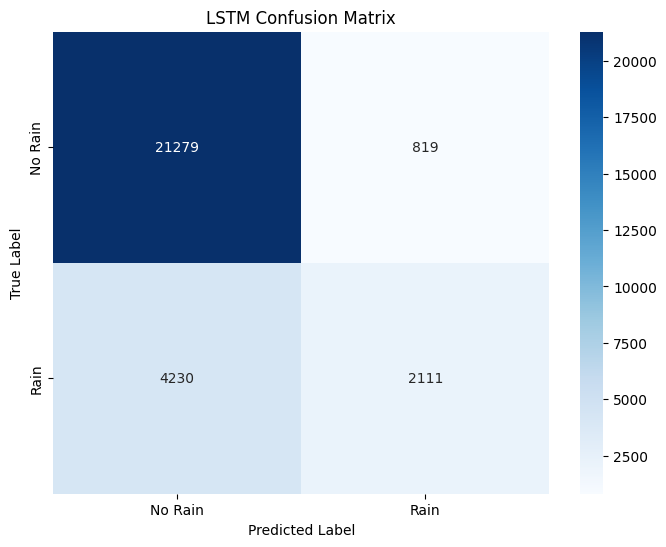

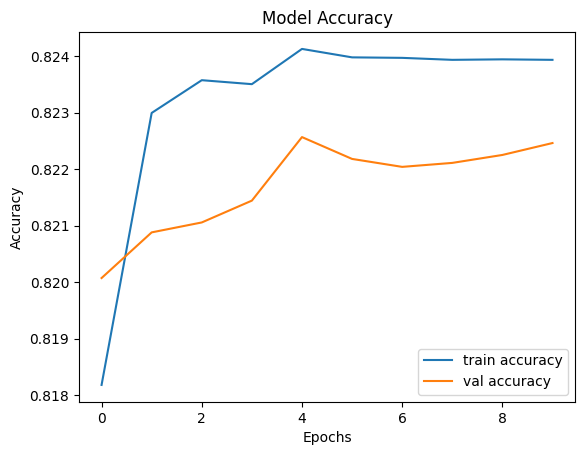

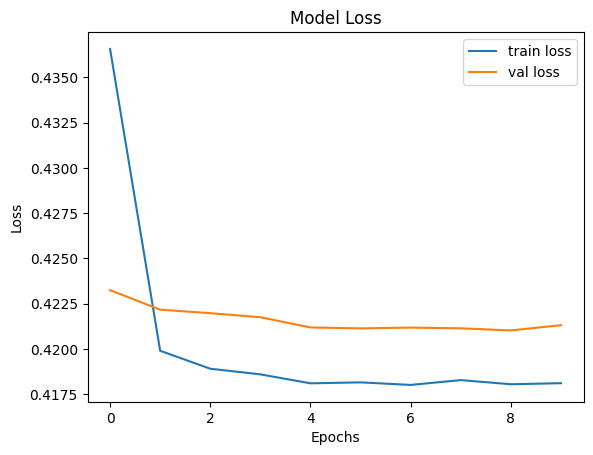

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data
weather_data = pd.read_csv('/content/Vamshi.zip')

# Drop rows with missing target values
weather_data = weather_data.dropna(subset=['RainTomorrow'])

# Encode categorical columns
label_enc = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    weather_data[col] = label_enc.fit_transform(weather_data[col].astype(str))

# Impute missing values for numerical columns
numerical_columns = weather_data.select_dtypes(include=['float64']).columns
weather_data[numerical_columns] = weather_data[numerical_columns].fillna(weather_data[numerical_columns].mean())

# Select two features for visualization
X = weather_data[['Humidity3pm', 'Temp3pm']]
y = weather_data['RainTomorrow']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM (samples, time steps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # Adding a time step dimension

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Convert labels to categorical (for classification problem)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(units=2, activation='softmax'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"LSTM Model Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred, 'LSTM Confusion Matrix')

# Note: LSTM does not have a decision boundary plot like Random Forest because it is designed for sequential data.
# It's not a simple classifier with a hyperplane but a deep learning model for time-dependent data.
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

